In [1]:
import pandas as pd
import numpy as np
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import csv
from functools import reduce

In [2]:
os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\usanews0")

                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.098853          -0.002052   
Hate Speech                 0.098853     1.000000           0.065796   
Sexual Harassment          -0.002052     0.065796           1.000000   
Trolling                   -0.002653     0.126080          -0.005315   
Others                           NaN          NaN                NaN   
Toxic                       0.212402     0.064199          -0.006409   

                   Trolling  Others     Toxic  
Direct Harassment -0.002653     NaN  0.212402  
Hate Speech        0.126080     NaN  0.064199  
Sexual Harassment -0.005315     NaN -0.006409  
Trolling           1.000000     NaN  0.117332  
Others                  NaN     NaN       NaN  
Toxic              0.117332     NaN  1.000000  


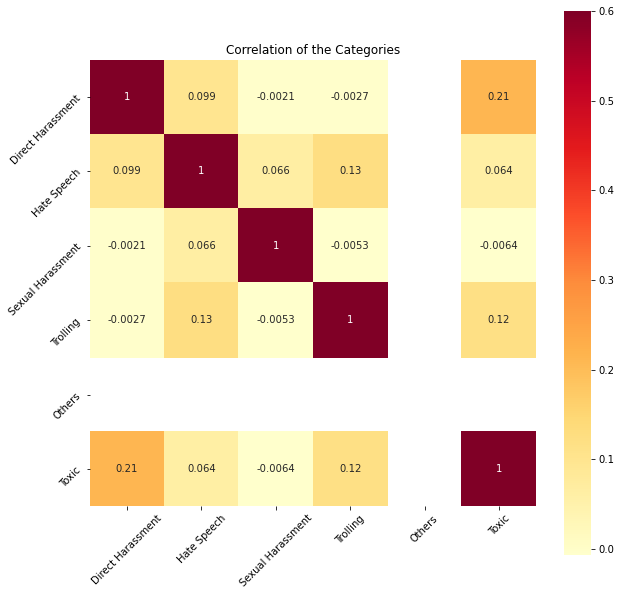

In [8]:
def heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    #df_corr = df.corr(method="pearson")
    df_corr = df.corr(method="spearman")
    print(df_corr)
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()
    
heatmap(df_test, 'Correlation of the Categories')

,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
15,0.0,0.017924,0.000000,0.000000,0.0,0.000000
2020,0.0,0.012409,0.000000,0.161381,0.0,0.053823
2021,0.0,0.000000,0.000000,0.116552,0.0,0.000000
911,0.0,0.012409,0.000000,0.080691,0.0,0.053823
9yr,0.0,0.000000,0.000000,0.000000,0.0,0.077744
...,...,...,...,...,...,...
yay,0.0,0.000000,0.078804,0.000000,0.0,0.000000
yeah,0.0,0.000000,0.000000,0.095574,0.0,0.063751
year,0.0,0.035848,0.000000,0.000000,0.0,0.000000
yes,0.0,0.014698,0.000000,0.095574,0.0,0.000000


                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.065036          -0.071591   
Hate Speech                 0.065036     1.000000          -0.124363   
Sexual Harassment          -0.071591    -0.124363           1.000000   
Trolling                   -0.125490    -0.105983          -0.177315   
Others                           NaN          NaN                NaN   
Toxic                       0.231157    -0.416356          -0.235232   

                   Trolling  Others     Toxic  
Direct Harassment -0.125490     NaN  0.231157  
Hate Speech       -0.105983     NaN -0.416356  
Sexual Harassment -0.177315     NaN -0.235232  
Trolling           1.000000     NaN -0.193919  
Others                  NaN     NaN       NaN  
Toxic             -0.193919     NaN  1.000000  


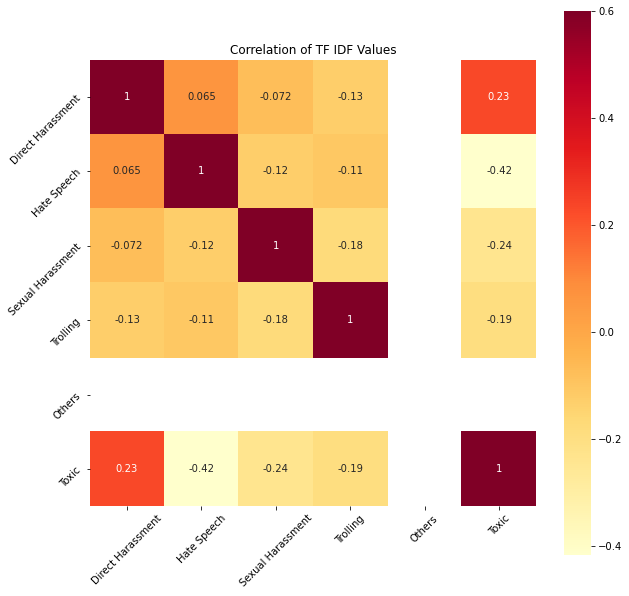

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_top_scores = {}
doc_per_label = {}
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', analyzer='word',
             min_df=1, lowercase=True, use_idf=True)

#combine messages as one document per category 
for label in labels:
    df_label = df.loc[df[label] == 1]
    if not df_label.empty:
       doc_per_label[label] = ' '.join(df_label['message'])
    else:
        doc_per_label[label] = ''

        
#get tfidf values 
vector = vectorizer.fit_transform(list(doc_per_label.values()))
features = np.array(vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(vector.todense(), columns=features, index=doc_per_label.keys())
display(tfidf_df.T)

#correlation of TF-IDF Values
heatmap(tfidf_df.T, "Correlation of TF IDF Values")


TOP TFIDF SCORES FOR EACH LABEL


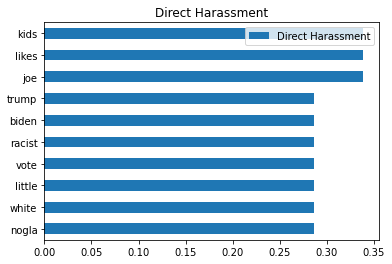

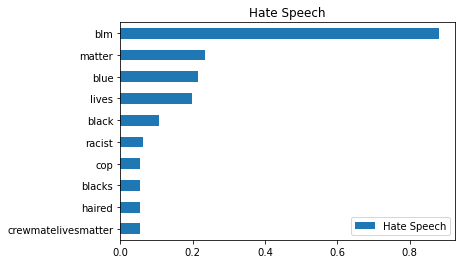

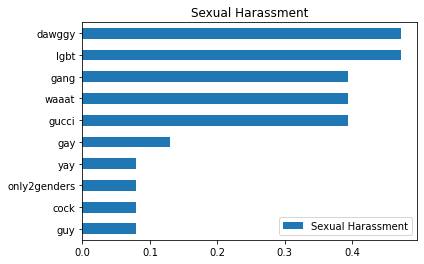

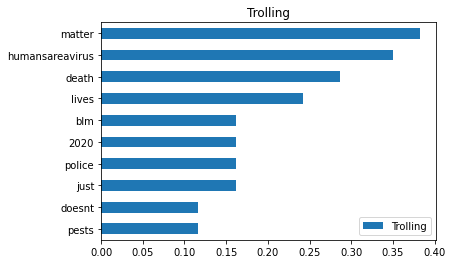

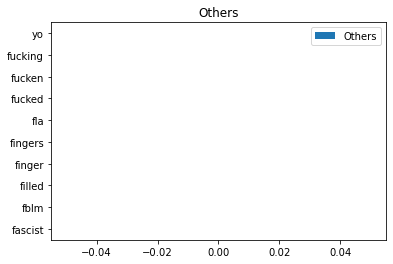

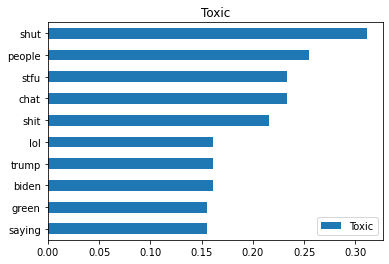

In [10]:
#get top 10 words per label 
print("TOP TFIDF SCORES FOR EACH LABEL")
for label in labels:
    #top 10 words per category
    TFIDF_top_scores[label] = pd.DataFrame(tfidf_df.T[label].sort_values().tail(10))
    #TFIDF_top_scores[label].columns = ["Word", "TF-IDF SCORE"]
    TFIDF_top_scores[label].plot(kind='barh')
    plt.title(label)
    plt.show()


,index,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,nogla,0.286196,0.012409,0.000000,0.000000,0.0,0.107646
1,white,0.286196,0.037227,0.000000,0.000000,0.0,0.053823
2,little,0.286196,0.012409,0.000000,0.000000,0.0,0.053823
3,vote,0.286196,0.024818,0.000000,0.000000,0.0,0.107646
4,racist,0.286196,0.062044,0.000000,0.000000,0.0,0.107646
5,biden,0.286196,0.024818,0.000000,0.000000,0.0,0.161469
6,trump,0.286196,0.037227,0.000000,0.000000,0.0,0.161469
7,joe,0.338987,0.000000,0.000000,0.000000,0.0,0.063751
8,likes,0.338987,0.000000,0.000000,0.000000,0.0,0.063751
9,kids,0.338987,0.000000,0.000000,0.000000,0.0,0.063751


                   Direct Harassment  Hate Speech  Sexual Harassment  \
Direct Harassment           1.000000     0.072314          -0.246313   
Hate Speech                 0.072314     1.000000          -0.409617   
Sexual Harassment          -0.246313    -0.409617           1.000000   
Trolling                   -0.298120     0.367953          -0.268305   
Others                           NaN          NaN                NaN   
Toxic                       0.342120     0.017857          -0.483287   

                   Trolling  Others     Toxic  
Direct Harassment -0.298120     NaN  0.342120  
Hate Speech        0.367953     NaN  0.017857  
Sexual Harassment -0.268305     NaN -0.483287  
Trolling           1.000000     NaN -0.060099  
Others                  NaN     NaN       NaN  
Toxic             -0.060099     NaN  1.000000  


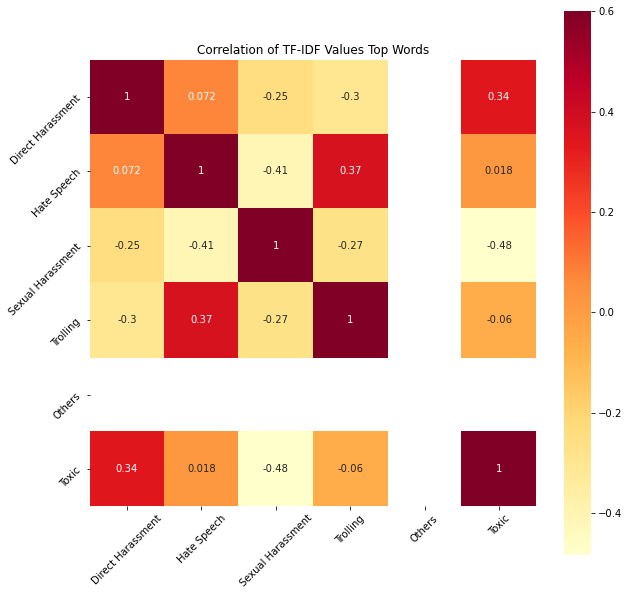

In [12]:
top_words = []
for label in labels:
    top_words.extend(list(TFIDF_top_scores[label].index))
    

top_tfidf_df = tfidf_df[top_words].T.reset_index()
display(top_tfidf_df)

heatmap(top_tfidf_df, "Correlation of TF-IDF Values Top Words")